In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import cv2
import os
import random
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from collections import Counter
from imutils import paths
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D

In [ ]:
input_dir= ("/content/drive/MyDrive/DS Worksop/DS Workshop/Brain Tumor Prediction")

In [ ]:
class_names = os.listdir(input_dir)

In [ ]:
class_names

['No', 'Yes']

In [ ]:
pred_dir= "/content/drive/MyDrive/DS Worksop/DS Workshop/Brain Tumor Prediction/Yes/y1.jpg"

In [ ]:
img = cv2.imread(pred_dir)

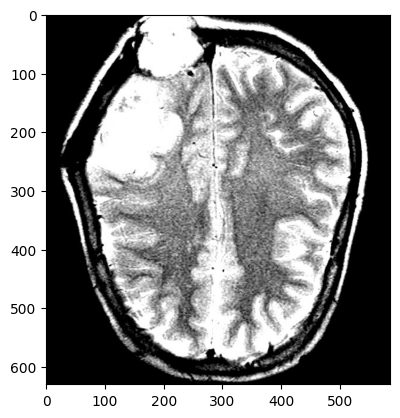

In [ ]:
plt.imshow(img)

In [ ]:
pred_dir= "/content/drive/MyDrive/DS Worksop/DS Workshop/Brain Tumor Prediction/No/no1.jpg"

In [ ]:
img = cv2.imread(pred_dir)

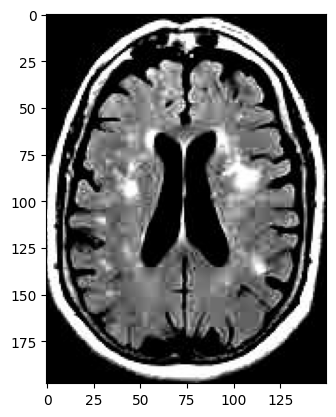

In [ ]:
plt.imshow(img)

In [ ]:
yes_path =  "/content/drive/MyDrive/DS Worksop/DS Workshop/Brain Tumor Prediction/Yes"
no_path =   "/content/drive/MyDrive/DS Worksop/DS Workshop/Brain Tumor Prediction/No"

In [ ]:
model = VGG16(weights='imagenet', include_top=False)

In [ ]:
def extract_features(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (50, 50))
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)

    features = model.predict(img)
    return features.flatten()

In [ ]:
print("VGG16 Model loaded sucessufully.!!")

VGG16 Model loaded sucessufully.!!


In [ ]:
class_names = ['no','yes']

In [ ]:
class_labels = {class_name: label for label, class_name in enumerate(class_names)}

In [ ]:
class_labels

{'no': 0, 'yes': 1}

In [ ]:
images_yes = []
label_yes = []

In [ ]:
for filename in os.listdir(yes_path):
    image_path = os.path.join(yes_path,filename)
    features = extract_features(image_path)
    images_yes.append(features)
    label_yes.append("yes")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━

In [ ]:
df_yes = pd.DataFrame(images_yes,columns=[f'Feature_{i}' for i in range(len(images_yes[0]))])
df_yes["Label"] = label_yes

In [ ]:
images_no = []
label_no = []

In [ ]:
for filename in os.listdir(no_path):
    image_path = os.path.join(no_path,filename)
    features = extract_features(image_path)
    images_no.append(features)
    label_no.append("no")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━

In [ ]:
df_no = pd.DataFrame(images_no,columns=[f'Feature_{i}' for i in range(len(images_no[0]))])
df_no["Label"] = label_no

In [ ]:
df_yes.shape

(200, 513)

In [ ]:
df_no.shape

(200, 513)

In [ ]:
feature_df =pd.concat([df_yes,df_no])

In [ ]:
feature_df.shape

(400, 513)

In [ ]:
X = feature_df.drop("Label",axis=1)

In [ ]:
y = feature_df['Label']

<ipython-input-122-8f6ba59e6858>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature_df['Label'], palette="Set2")


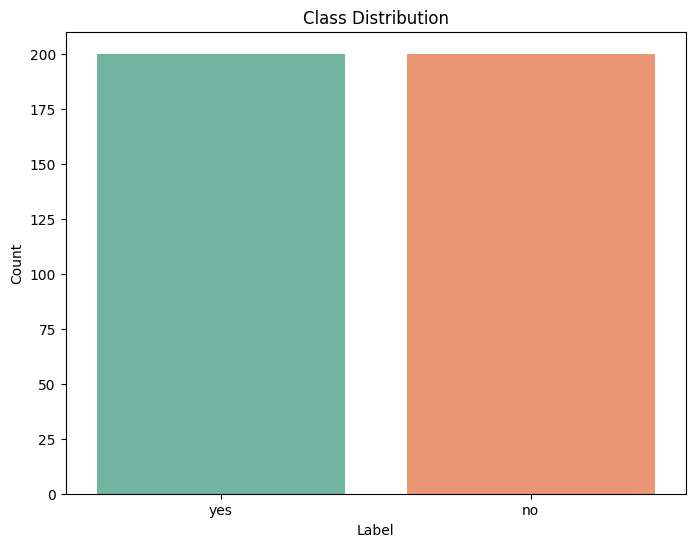

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x=feature_df['Label'], palette="Set2")
plt.title("Class Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()


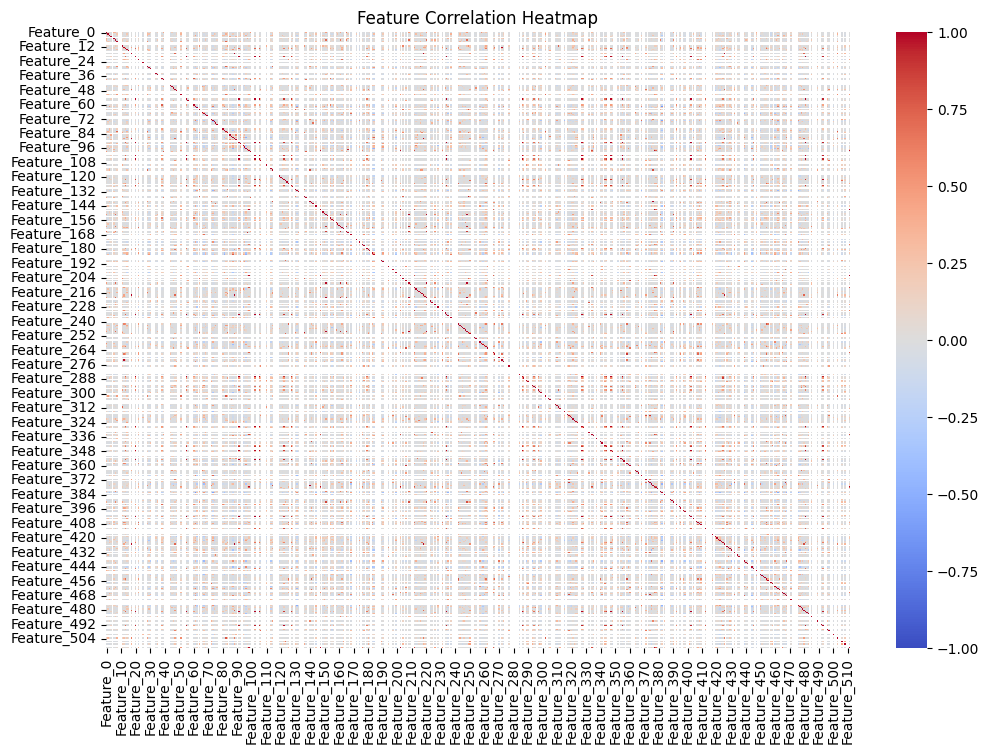

In [ ]:
corr_matrix = feature_df.drop("Label", axis=1).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Feature Correlation Heatmap")
plt.show()

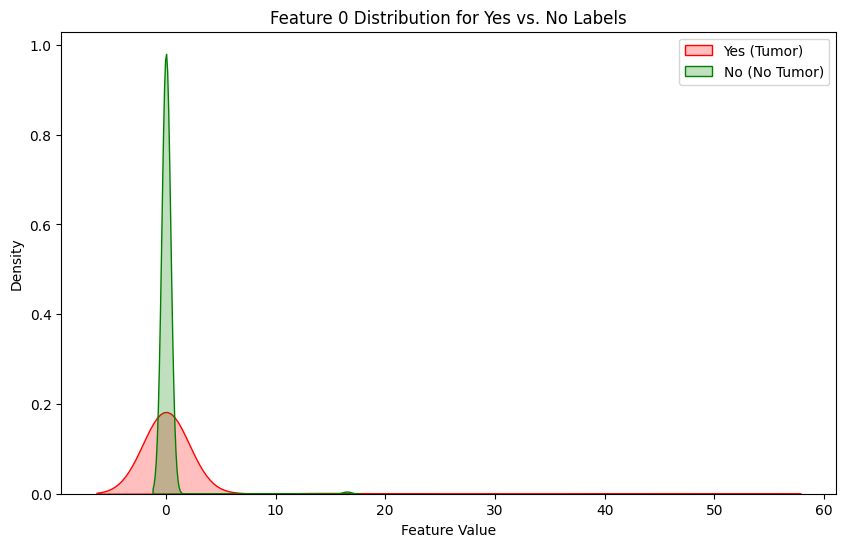

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=feature_df[feature_df['Label'] == 'yes'], x='Feature_0', label='Yes (Tumor)', fill=True, color='red')
sns.kdeplot(data=feature_df[feature_df['Label'] == 'no'], x='Feature_0', label='No (No Tumor)', fill=True, color='green')
plt.title("Feature 0 Distribution for Yes vs. No Labels")
plt.xlabel("Feature Value")
plt.ylabel("Density")
plt.legend()
plt.show()

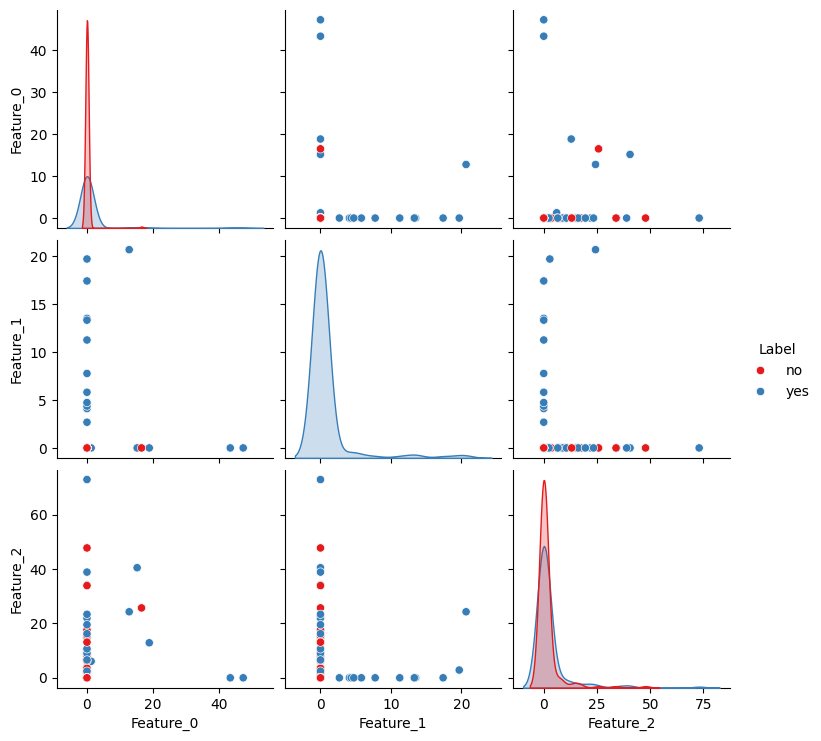

In [ ]:
# Pairplot to observe relationships
sampled_df = feature_df.sample(n=300, random_state=42)  # Sampling for better performance
sns.pairplot(sampled_df, vars=['Feature_0', 'Feature_1', 'Feature_2'], hue='Label', diag_kind="kde", palette="Set1")
plt.show()


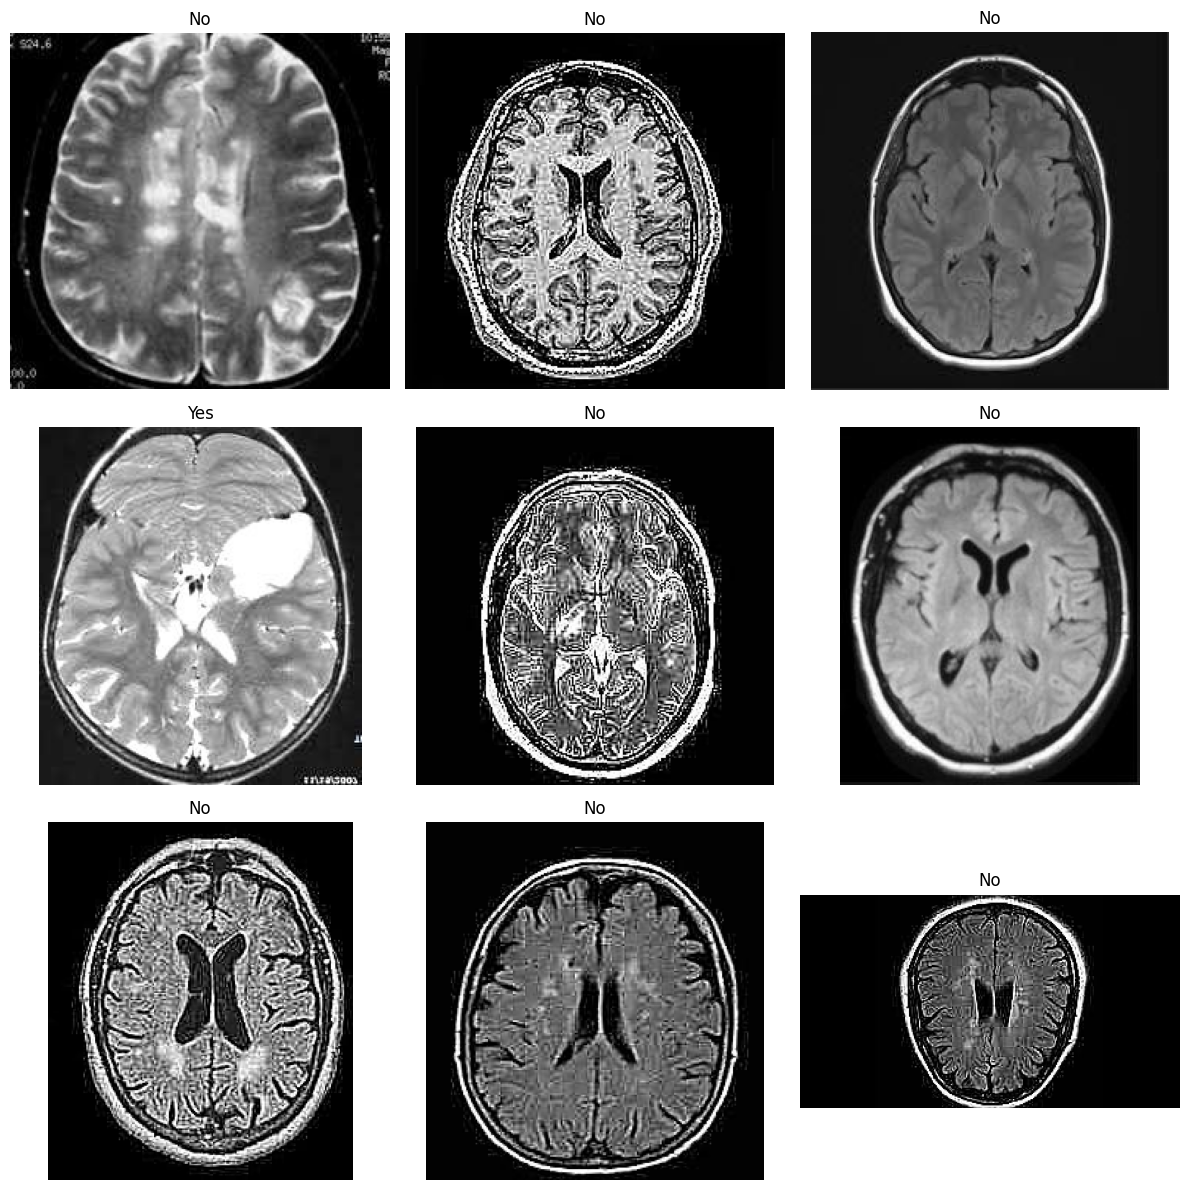

In [ ]:
from PIL import Image

# Visualize sample images
sample_images = paths.list_images(input_dir)
plt.figure(figsize=(12, 12))
for i, img_path in enumerate(random.sample(list(sample_images), 9)):
    plt.subplot(3, 3, i + 1)
    img = Image.open(img_path)
    plt.imshow(img)
    label = 'Yes' if 'Yes' in img_path else 'No'
    plt.title(label)
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
X

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_502,Feature_503,Feature_504,Feature_505,Feature_506,Feature_507,Feature_508,Feature_509,Feature_510,Feature_511
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,7.090338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
198,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [ ]:
print("X_train = ",X_train.shape)
print("X_test = ",X_test.shape)

print("y_train = ",y_train.shape)
print("y_test = ",y_test.shape)

X_train =  (280, 512)
X_test =  (120, 512)
y_train =  (280,)
y_test =  (120,)


In [ ]:
model = LogisticRegression()
print("Model Created")

Model Created


In [ ]:
model.fit(X_train,y_train)
print("Model Training Completed")

Model Training Completed


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
joblib.dump(model, 'my_model.h5')
print("Model saved as 'my_model.h5'")

Model saved as 'my_model.h5'


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
acc = accuracy_score(y_test , y_pred)
print("Accuracy :- ",acc*100)

Accuracy :-  92.5


In [ ]:
print("Error rate = ",(1-acc) * 100 )

Error rate =  7.499999999999996


In [ ]:
precision = precision_score(y_test, y_pred, pos_label='yes')
print(f"Precision: {precision * 100:.2f}%")

Precision: 93.22%


In [ ]:
recall = recall_score(y_test, y_pred, pos_label='yes')
print(f"Recall: {recall * 100:.2f}%")

Recall: 91.67%


In [ ]:
f1 = f1_score(y_test, y_pred, pos_label='yes')
print(f"F1 Score: {f1 * 100:.2f}%")

F1 Score: 92.44%


In [ ]:
#Testing now

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 718ms/step
The model predicts: Brain tumor detected.


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


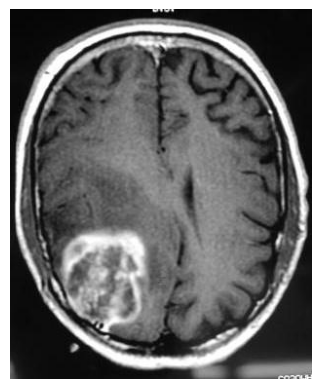

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=GlobalAveragePooling2D()(base_model.output))

def extract_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    features = model.predict(img_array)
    return features.flatten()

logistic_model = joblib.load('my_model.h5')
new_image_path = "/content/drive/MyDrive/DS Worksop/DS Workshop/Brain Tumor Prediction/Yes/y104.jpg"
features = extract_features(new_image_path)
features = features.reshape(1, -1)
prediction = logistic_model.predict(features)
if prediction[0] == 'yes':
    print("The model predicts: Brain tumor detected.")
else:
    print("The model predicts: No brain tumor detected.")
img = cv2.imread(new_image_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()